# The `analosis` package

**Author**: Natalie B. Hogg

The `analosis` (`analysis` + `los`) package allows us to perform various analyses of the line-of-sight effects using `lenstronomy` while maintaining the same settings across the board. 

**Warning**: in reality this means many parameter choices are hard-coded inside `analosis`. 

This notebook provides the interface with the `analosis` package, allowing you to choose what type of lensing scenario to analyse and to save the results to your machine.

In [1]:
# set the path to analosis relative to this notebook
import sys
sys.path.append('../..')

# import the Run class which allows you to run the analysis of your choice
from analosis.run import Run

### Cosmology
Choose the cosmological parameters which will be used by `lenstronomy`, `astropy` and `colossus` (for halo mass functions). The `id` must match one of those known to `colossus`: https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#standard-cosmologies.

### Scenario
Choose the scenario you want to analyse.

Options:
* `composite lens`
* `distributed haloes`

### Complexity
Set the model complexity: you can choose to fit the generated image with a perfect model, a perfect minimal model, or a variety of incomplete minimal models. **This choice is only relevant for the composite lens**. It will be ignored if you run the distributed haloes scenario.

Options:
* `perfect`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS`
* `perfect minimal`: fits the generated image with a model consisting of `main lens` + `halo`+ `LOS MINIMAL`
* `missing halo`: fits the generated image with a model consisting of `main lens` +  `LOS MINIMAL`
* `missing offset`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo centre fixed to zero
* `missing ellipticity`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo ellipticity fixed to zero

### Number of runs
Choose the number of runs you want to do i.e. how many images will be created and fit.

### Parameters
Other parameters.

In [2]:
cosmology = {'id': 'planck18', 'H0': 67.4, 'Om': 0.315}

settings = {'scenario': 'composite lens',
            'complexity': 'minimal spherical halo',
            'lens_light': False,
            'number_of_images': 10,
            'MCMC': False,
            'job_name': 'test',
            'n_burn': 1000,
            'n_run': 1000}

parameters = {'maximum_shear': 0.03,
              'Einstein_radius_min': 0.5, # arcsec
              'maximum_source_offset_factor': 1,
              'sigma_halo_offset': 300} # pc

### Run
Finally, run the analysis. Note that you don't need to specify a path where you want your results to be saved: `analosis` automatically saves everything to a dedicated results directory. **Please don't push the contents of this directory to github!** (There is a .gitignore in place to prevent this, so you shouldn't have to worry about doing it accidentally).

In [3]:
result = Run(cosmology, settings, parameters)

Running the composite lens case with the following settings:

Model: minimal spherical halo
Number of images: 10
Lens light: False
MCMC will not be run.

Analysis complete and results saved at /Users/pierrefleury/GitHub/analosis/analosis/results.


In [4]:
from analosis.analysis.plots import Plots
p = Plots()
#path = result.pathfinder()
path = '/Users/pierrefleury/GitHub/analosis/analosis/results'

### Image plot

Preparing image plot...


../../analosis/analysis/plots.py:69: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(image_list[n]), origin='lower', vmin=v_min, vmax=v_max, cmap=cmap, extent=[0, 1, 0, 1])


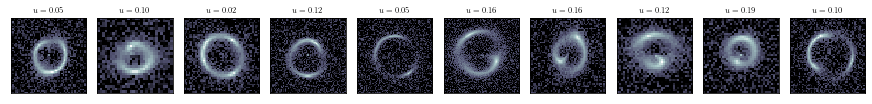

In [5]:
p.image_plot(path, settings, number_of_columns=10)

### Input vs output plot

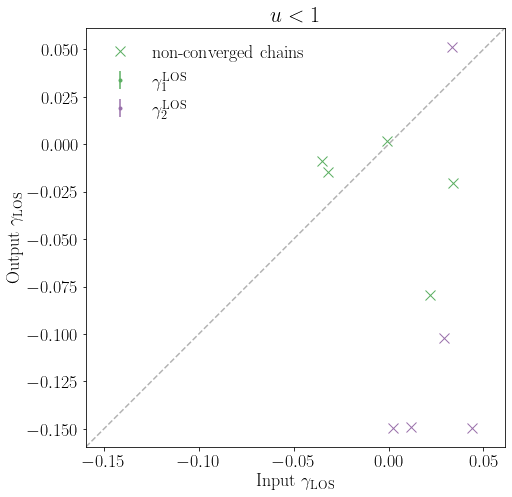

In [6]:
p.input_output_plot(path, settings, show_not_converged=True)

### Examine input kwargs

In [15]:
import pandas as pd
kwargs = pd.read_csv(path + '/datasets/test_input_kwargs.csv')
kwargs

,kappa_os,gamma1_os,gamma2_os,omega_os,kappa_od,gamma1_od,gamma2_od,omega_od,kappa_ds,gamma1_ds,...,e1_sl,e2_sl,R_sersic_ll,n_sersic_ll,e1_ll,e2_ll,x_ll,y_ll,magnitude_ll,theta_E
0,0,-0.011998,0.010257,0,0,-0.004250,0.007482,0,0,0.003213,...,0.159489,-0.091453,0.367112,3.657665,0.018784,0.009469,0.0,0.0,20.715627,0.989447
1,0,-0.007206,0.028172,0,0,0.008615,0.007300,0,0,0.011493,...,0.028119,-0.098751,0.612527,4.089061,0.001738,-0.025601,0.0,0.0,19.990890,1.176317
2,0,0.008418,0.026768,0,0,-0.003049,0.019113,0,0,0.006033,...,0.285536,-0.082626,0.391903,3.956065,0.003836,-0.010794,0.0,0.0,20.561461,1.123804
3,0,-0.002957,0.014228,0,0,-0.009250,0.003207,0,0,-0.014666,...,0.182894,-0.018127,0.440150,4.206908,-0.010700,0.016664,0.0,0.0,20.179036,1.043677
4,0,0.009696,0.018424,0,0,0.020700,0.005073,0,0,0.024706,...,0.039118,0.141721,0.341549,3.748216,0.021303,0.039205,0.0,0.0,20.763173,1.336787
5,0,0.008508,0.019019,0,0,-0.022579,0.017783,0,0,-0.017754,...,-0.129499,-0.154055,0.333807,2.744479,-0.016320,-0.019874,0.0,0.0,20.509090,1.055353
6,0,-0.006049,0.001914,0,0,0.010654,0.004989,0,0,0.006336,...,-0.140969,0.133038,0.306403,5.118355,0.019210,0.047716,0.0,0.0,21.018490,0.787697
7,0,-0.002432,0.024915,0,0,0.004592,0.025643,0,0,0.024842,...,-0.086933,0.067944,0.311922,3.574002,-0.038329,0.014047,0.0,0.0,21.037918,0.767499
8,0,-0.002144,0.013025,0,0,0.027199,0.005923,0,0,0.013644,...,-0.193910,0.372423,0.229309,4.796645,0.008516,0.001371,0.0,0.0,21.417192,0.867925
9,0,0.010583,0.026603,0,0,0.029588,0.003793,0,0,0.018114,...,0.077294,-0.291603,0.294844,3.455817,-0.041611,-0.012165,0.0,0.0,21.173672,0.772688
